In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv (city_data_to_load)
ride_df = pd.read_csv (ride_data_to_load)
# Combine the data into a single dataset
city_ride_df = pd.merge(city_df, ride_df, on = 'city')
# Display the data table for preview
city_ride_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [16]:
#Creating separate DFs for each city type 
urban_city = city_ride_df.loc[(city_ride_df["type"] == "Urban")]
suburban_city = city_ride_df.loc[(city_ride_df["type"] == "Suburban")]
rural_city = city_ride_df.loc[(city_ride_df["type"] == "Rural")]

## Bubble Plot of Ride Sharing Data

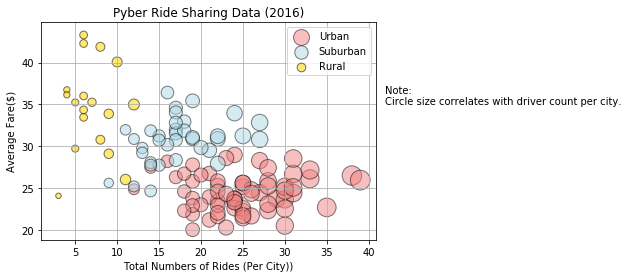

In [48]:
# Obtain the x and y coordinates for each of the three city types
#Determing x and y axis for Urban cities
avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()

#Determing x and y axis for Suburban cities
avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()

#Determing x and y axis for Rural cities
avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()

# Build the scatter plots for each city types
plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")
plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightblue", edgecolors='black',alpha = 0.5, label="Suburban")
plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")



# Incorporate the other graph properties
# Chart title
plt.title("Pyber Ride Sharing Data (2016)")
# x label
plt.xlabel("Total Numbers of Rides (Per City))")
# y label
plt.ylabel("Average Fare($)")

# Create a legend
plt.legend(loc='upper right')
plt.grid()

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("../Images/PyberCityRides.png")


## Total Fares by City Type

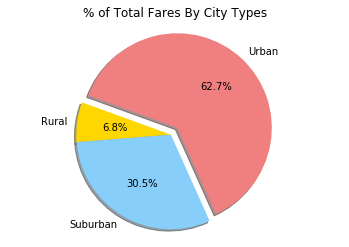

In [41]:
# Calculate Type Percents
total_fare = city_ride_df.groupby(['type'])['fare'].sum()
# Build Pie Chart
colors = ["gold","lightskyblue","lightcoral"]
labels = ["Rural","Suburban","Urban" ]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
# Save Figure
plt.savefig("../Images/Total Fares By City Types.png")
plt.show()


## Total Rides by City Type

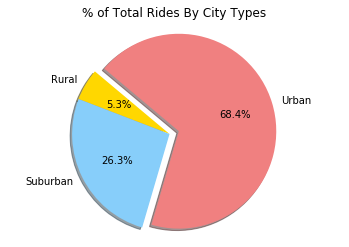

In [42]:
# Calculate Ride Percents
total_rides = city_ride_df.groupby(['type'])['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
# Save Figure
plt.savefig("../Images/Total Rides By City Types.png")
plt.show()

## Total Drivers by City Type

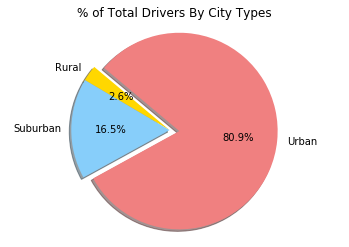

In [46]:
# Calculate Driver Percents
total_drivers = city_df.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")


# Save Figure
plt.savefig("../Images/Total Drivers By City Types.png")
plt.show()